## Classification for Heart Disease Dataset

## Importing the libraries

Installing required libraries

In [235]:
!pip3 install numpy
!pip3 install matplotlib    
!pip3 install pandas
!pip3 install sklearn
!pip3 install scikit-learn
!pip3 install seaborn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Importing the libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

## Importing the dataset

In [41]:
dataset = pd.read_csv('Data.csv')
dataset = dataset.drop(columns=['Job Title'], axis=1)
dataset

,Age,Gender,Education Level,Years of Experience,Salary
0,32,Male,Bachelor's,5.0,90000
1,28,Female,Master's,3.0,65000
2,45,Male,PhD,15.0,150000
3,36,Female,Bachelor's,7.0,60000
4,52,Male,Master's,20.0,200000
...,...,...,...,...,...
368,35,Female,Bachelor's,8.0,85000
369,43,Male,Master's,19.0,170000
370,29,Female,Bachelor's,2.0,40000
371,34,Male,Bachelor's,7.0,90000


In [42]:
len(dataset)

373

In [43]:
dataset.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32,Male,Bachelor's,5.0,90000
1,28,Female,Master's,3.0,65000
2,45,Male,PhD,15.0,150000
3,36,Female,Bachelor's,7.0,60000
4,52,Male,Master's,20.0,200000


In [44]:
dataset.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    int64  
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Years of Experience  373 non-null    float64
 4   Salary               373 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 14.7+ KB


In [46]:
dataset.dtypes

Age                      int64
Gender                  object
Education Level         object
Years of Experience    float64
Salary                   int64
dtype: object

In [47]:
dataset.isnull().any()

Age                    False
Gender                 False
Education Level        False
Years of Experience    False
Salary                 False
dtype: bool

## Preprocessing

Encoding Categorial Columns

In [48]:
le = LabelEncoder()
dataset['Education Level'] = le.fit_transform(dataset['Education Level'])
dataset['Gender'] = le.fit_transform(dataset['Gender'])
dataset

,Age,Gender,Education Level,Years of Experience,Salary
0,32,1,0,5.0,90000
1,28,0,1,3.0,65000
2,45,1,2,15.0,150000
3,36,0,0,7.0,60000
4,52,1,1,20.0,200000
...,...,...,...,...,...
368,35,0,0,8.0,85000
369,43,1,1,19.0,170000
370,29,0,0,2.0,40000
371,34,1,0,7.0,90000


Specifying dependent and independent columns

In [49]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Standard Scaling

In [50]:
sc = RobustScaler()
X = sc.fit_transform(X)
X

array([[-0.30769231,  0.        ,  0.        , -0.36363636],
       [-0.61538462, -1.        ,  1.        , -0.54545455],
       [ 0.69230769,  0.        ,  2.        ,  0.54545455],
       ...,
       [-0.53846154, -1.        ,  0.        , -0.63636364],
       [-0.15384615,  0.        ,  0.        , -0.18181818],
       [ 0.61538462, -1.        ,  2.        ,  0.54545455]])

Split the dataset into training and testing sets

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('X_train shape => ', X_train.shape)
print('y_train shape => ', y_train.shape)
print('X_test shape => ', X_test.shape)
print('y_test shape =>', y_test.shape)

X_train shape =>  (298, 4)
y_train shape =>  (298,)
X_test shape =>  (75, 4)
y_test shape => (75,)


In [52]:
print(X_train[:, 1].min())
print(X_train[:, 1].max())

-1.0
0.0


## Training the model

Training using SGDRegressor

In [53]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Testing the model

In [54]:
y_pred = model.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_test),1)), axis=1))


[[ 40000.          37555.21228948]
 [ 40000.          52549.44090314]
 [ 50000.          43360.89087168]
 [140000.         150241.18015351]
 [ 85000.          75162.70674887]
 [140000.         151659.19063936]
 [ 60000.          54713.41538622]
 [115000.         135856.40002294]
 [ 40000.          47002.59497081]
 [190000.         172595.61334936]
 [ 70000.          60519.09396842]
 [130000.         110606.22672518]
 [150000.         148626.93502332]
 [105000.          95216.64994751]
 [120000.         123757.91151118]
 [ 60000.          66934.22103372]
 [ 45000.          55581.69651918]
 [ 40000.          47002.59497081]
 [150000.         146112.34470703]
 [180000.         166789.93476716]
 [ 90000.          81836.66646404]
 [ 95000.          87383.51239637]
 [120000.         101768.29252694]
 [ 40000.          40328.63525564]
 [170000.         178660.12458144]
 [ 40000.          43102.05822181]
 [ 45000.          54972.24803609]
 [ 50000.          69966.47664975]
 [120000.         12

## Predicting new value

In [55]:
new_val = [[30, 0, 1, 1]]
new_val_scaled = sc.transform(new_val)
print(model.predict(new_val_scaled))


[53708.61873912]


## Visualizing the dataset

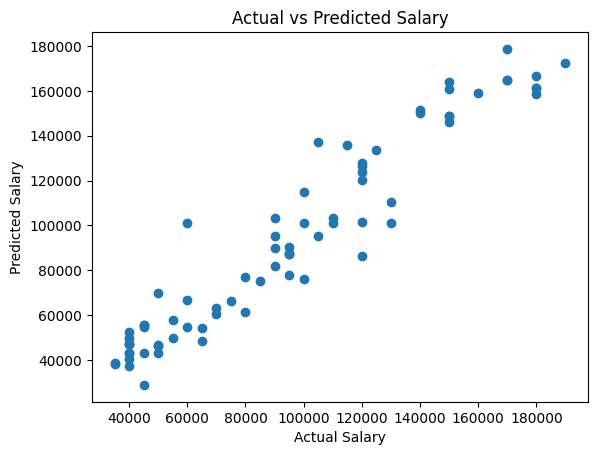

In [56]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()


## Evaluate the model

R-Square

In [57]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.4f}')

R-squared: 0.9161


MAE / RMSE

In [58]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

MAE: 10218.1347
RMSE: 170582757.5307
